In [1]:
from IPython.display import Image

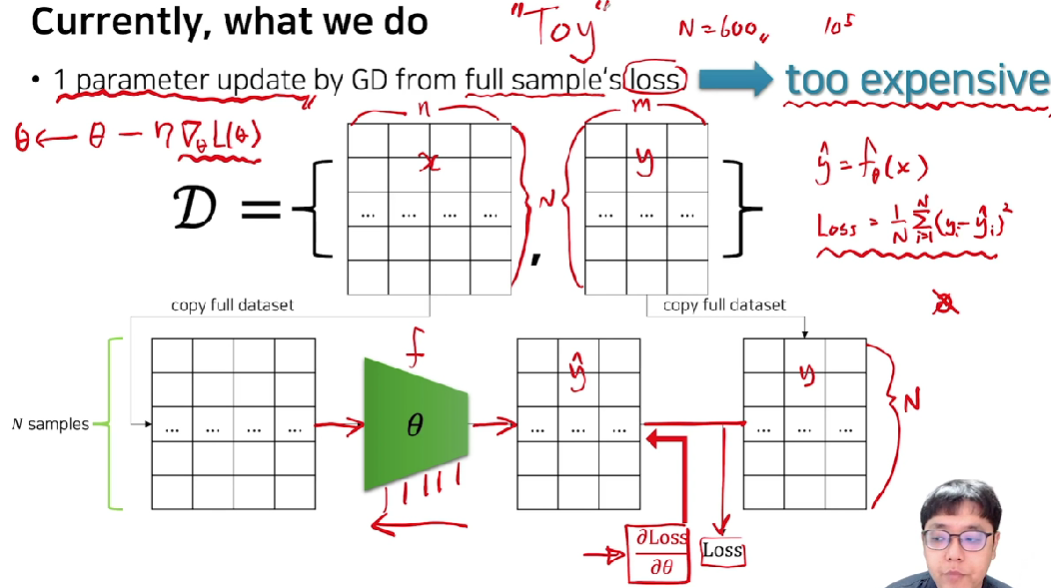

In [2]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\1.png")

이제까지는 전체 데이터셋를 넣고 Loss구하고 backward했었는데 데이터양이 엄청 많아지면 비싸짐. 

## Stochastic Gradient Descent - 확률적 경사 하강법

* 추출된 데이터 한개에 대해서 그래디언트를 계산하고, 경사 하강 알고리즘을 적용하는 방법을 말한다. 전체 데이터를 사용하는 것이 아니라, 랜덤하게 추출한 일부 데이터를 사용하는 것이다.
* 일부데이터를 랜덤하게 feed-forward해서 backward해서 업데이트한다
* 첫번째 업데이트:  k개의 랜덤 샘플을 뽑는다.
* 2번째 업데이트: 또 다른 k개의 랜덤샘플
* 3번째 업데이트 : 남은 샘플

학습 중간 과정에서 결과의 진폭이 크고 불안정하며, 속도가 매우 빠르다. 또한, 데이터 하나씩 처리하기 때문에 오차율이 크고 GPU의 성능을 모두 활용하지 못하는 단점을 가진다. 
* 이러한 단점들을 보완하기 위해 나온 방법들이 Mini batch를 이용한 방법이며, 확률적 경사 하강법의 노이즈를 줄이면서도 전체 배치보다 더 효율적인 것으로 알려져 있다. 

* Batch는 모든 데이터를 한꺼번에 학습하는데 활용하기 때문에 부드럽게 수렴하나 샘플의 개수만큼 계산해야하기떄문에 시간이 다소 소요된다. 

* Stochastic 방법은 데이터를 한개씩 추출해서 처리해보고 이를 모든 학습데이터에 대해 적용한 것이다. 

* Mini-Batch 는 전체 학습데이터를 배치 사이즈로 나누어서 순차적으로 진행한다. 일반적으로 딥러닝 학습에 사용되는 방법이며, Batch 보다 빠르고 SGD 보다 낮은 오차율을 가진다.

다루어야 할 데이터가 너무 많기도 하고(메모리가 부족하기도 하고) 한 번의 계산으로 최적화된 값을 찾는 것은 힘듭니다. 따라서, 머신 러닝에서 최적화(optimization)를 할 때는 일반적으로 여러 번 학습 과정을 거칩니다. 또한, 한 번의 학습 과정 역시 사용하는 데이터를 나누는 방식으로 세분화 시킵니다.

​이때, epoch, batch size, iteration라는 개념이 필요합니다.


### Epoch

* 학습한 횟수
* 한 번의 epoch는 인공 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함. 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태

▶ 신경망에서 사용되는 역전파 알고리즘(backpropagation algorithm)은 파라미터를 사용하여 입력부터 출력까지의 각 계층의 weight를 계산하는 과정을 거치는 순방향 패스(forward pass), forward pass를 반대로 거슬러 올라가며 다시 한 번 계산 과정을 거처 기존의 weight를 수정하는 역방향 패스(backward pass)로 나뉩니다. 이 전체 데이터 셋에 대해 해당 과정(forward pass + backward pass)이 완료되면 한 번의 epoch가 진행됐다고 볼 수 있습니다.


### Batch size

* batch size는 한 번의 batch마다 주는 데이터 샘플의 size. 여기서 batch(보통 mini-batch라고 표현)는 나눠진 데이터 셋을 뜻하며 iteration는 epoch를 나누어서 실행하는 횟수라고 생각하면 됨.


▶ 메모리의 한계와 속도 저하 때문에 대부분의 경우에는 한 번의 epoch에서 모든 데이터를 한꺼번에 집어넣을 수는 없습니다. 그래서 데이터를 나누어서 주게 되는데 이때 몇 번 나누어서 주는가를 iteration, 각 iteration마다 주는 데이터 사이즈를 batch size라고 합니다.

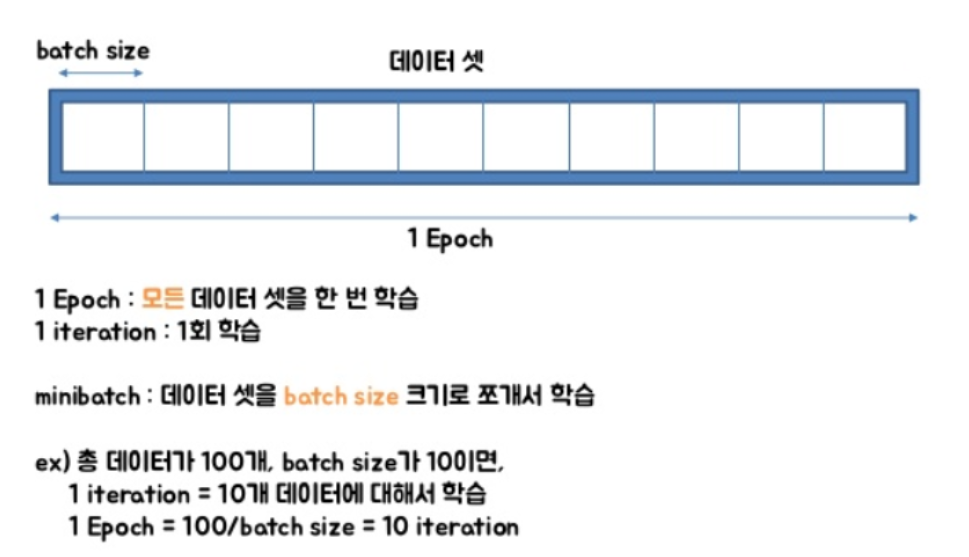

In [3]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\2.png")

### 정리


* 전체 2000 개의 데이터가 있고, epochs = 20, batch_size = 500이라고 가정합시다.


* 그렇다면 1 epoch는 각 데이터의 size가 500인 batch가 들어간 4번의 iteration으로 나누어집니다.

그리고 전체 데이터셋에 대해서는 20 번의 학습이 이루어졌으며, iteration 기준으로 보자면 총 80 번의 학습이 이루어진 것입니다.

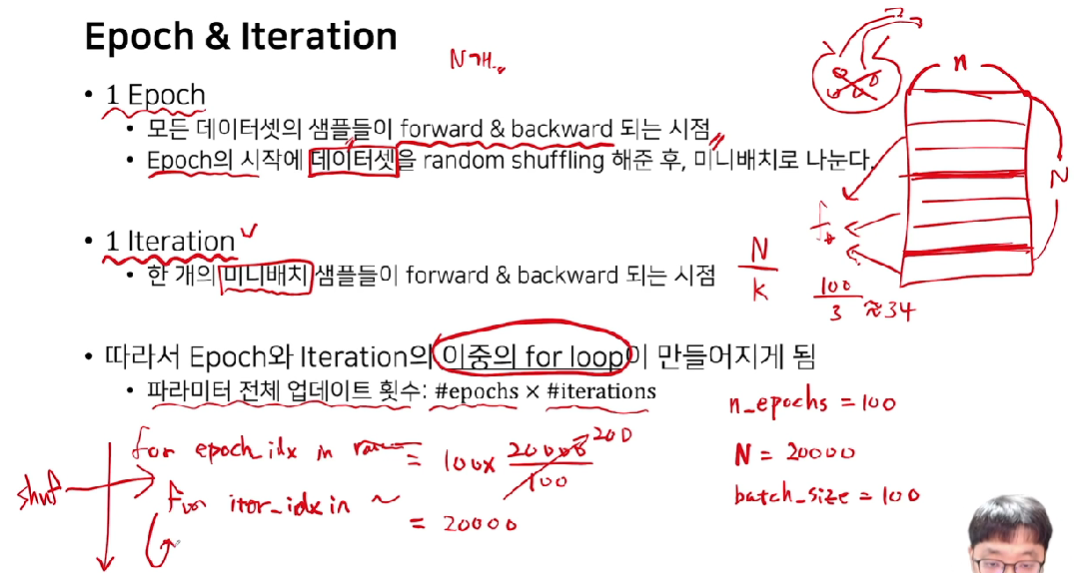

In [4]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\3.png")

* Epoch
중복되지않게 추출한다. 하면 빼면 들어가지 않음.
다 뺀 시점을 한 Epoch. 예를들어 10 epoch을 돌린다하면 모델은 데이터를 10번 돈거. 
Epoch하기전 데이터셋을 random하게 셔플링하고 k개씩 끊어준다.

* 그래서 한 epoch은 n/k개의 iteration으로 이루어져있음.
즉 N(데이터개수) = 100, k = 3(K개의 미니배치) 이면 34개의 iteration이 있음

* 따라서 전체 파라미터 업데이트 횟수는 Epoch X iteration. 그래서 구현할때는 for 문이 이중으로 있음 

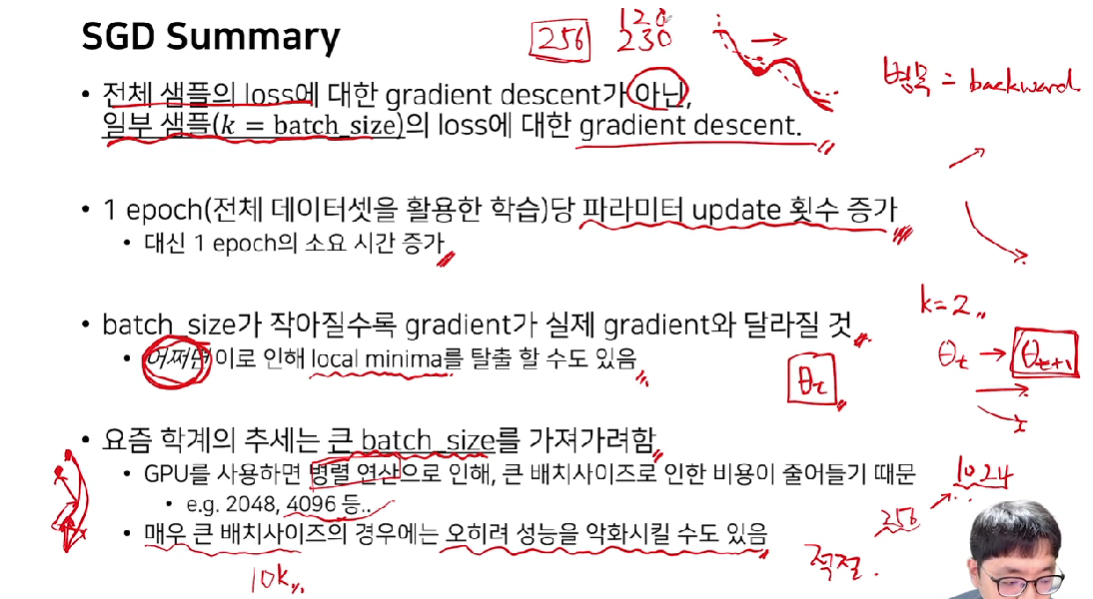

In [5]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\4.png")

* 전에는 전체 데이터를 한번에 넣어서 한번만 업데이트 했는데 sgd는 미니배치로 파라미터 업데이트 횟수가 증가됨. backward가 오래 걸림.(미분이라서) = 1 epoch 시간도 늘어남.   

* batch size가 작아질수록 gradient도 달라져서 local minima를 탈출할수도 있음. 

* 큰 batch size가 좋다는 말도 있음
왜냐면 방향은 비슷할테니깐 learning rate를 크게 감. 만약 batch size가 256 -> 1024 으로 바뀌었으면 파라미터 업데이트 횟수는 4배 더 적어짐. 어차피 방향은 똑같으니깐 1024가 1번 걸어갈때 256은 4번 지그재그로 걸어가야하니깐 걍 큰거ㄱㄱ. 배치사이즈 커도 GPU를 사용해서 병렬 연산해서 시간 오래 걸리지않음.

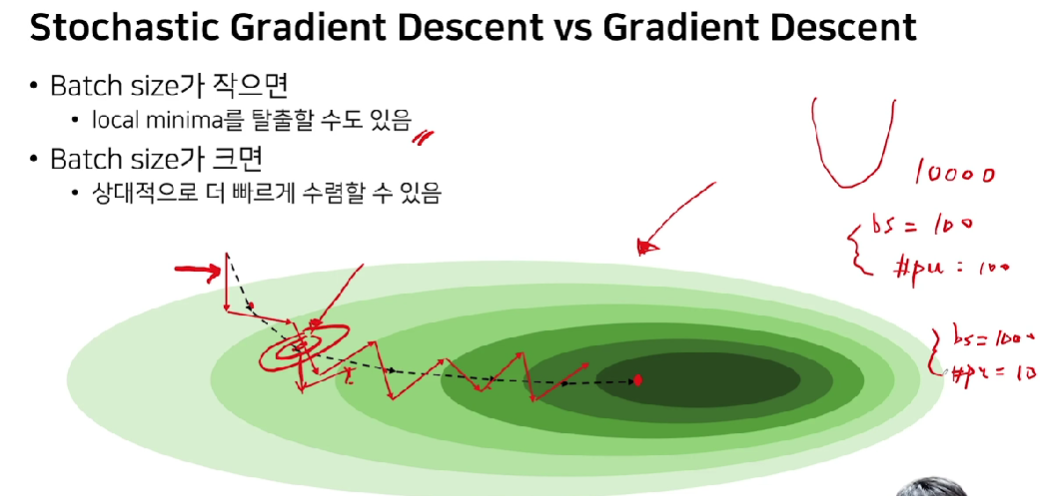

In [6]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\5.png")

batch 사이즈 클수록 noise해지지 않아 전체데이터의 gradient 방향과 유사해짐. 그러므로 상대적으로 더 빠르게 수렴할수 있음.

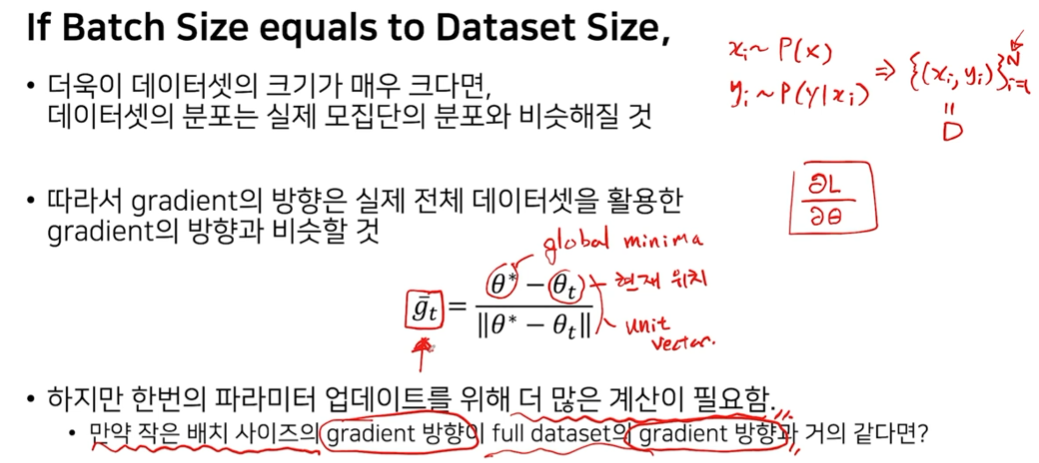

In [7]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\6.png")

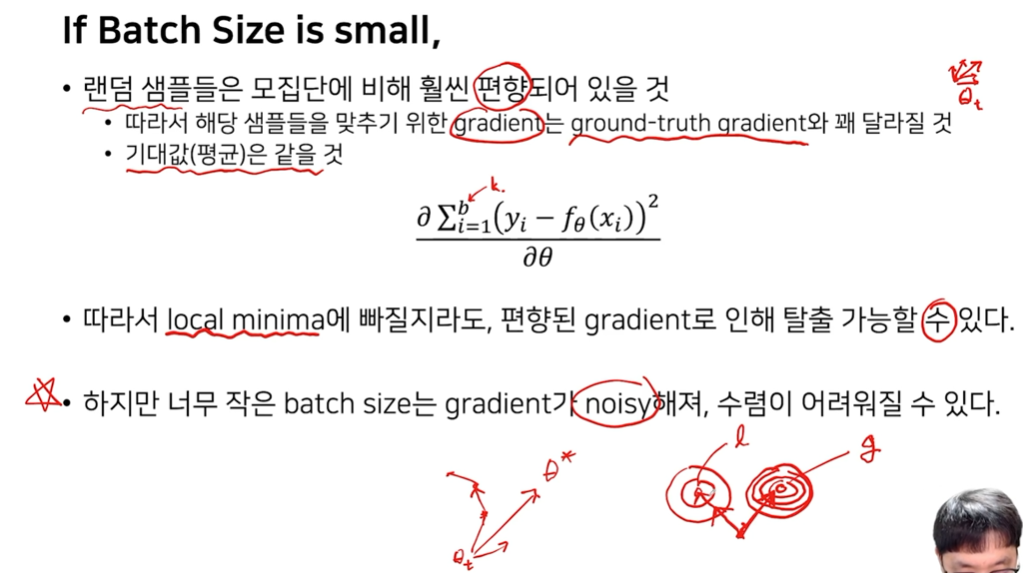

In [8]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\7.png")

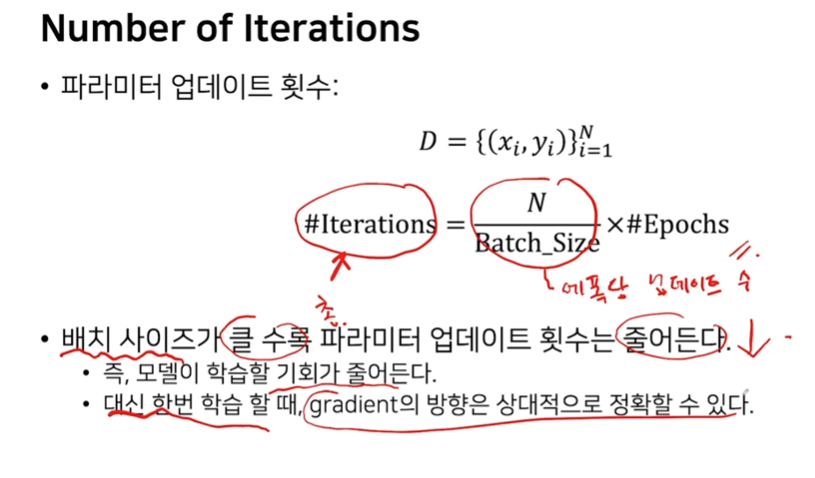

In [9]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\8.png")

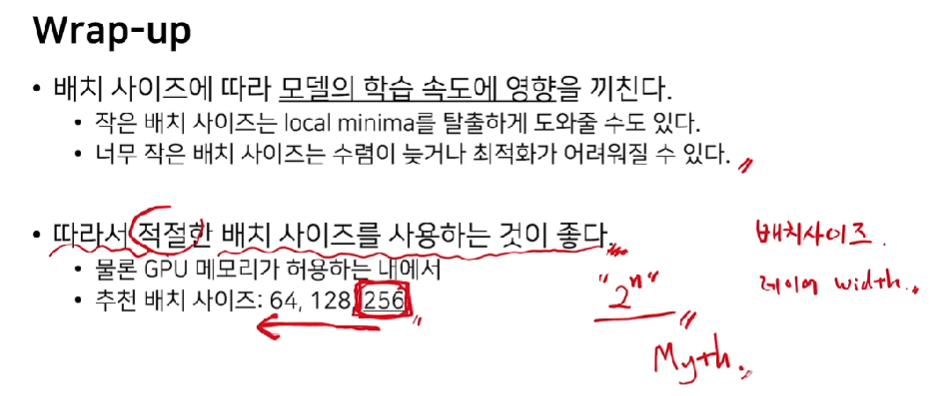

In [10]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\9.png")